In [1]:
#Lab 6

In [ ]:
pip install "jupyter-ai-magics[all]" -q

In [ ]:
pip install -U pip setuptools wheel

In [ ]:
pip install --only-binary=:all: "tiktoken>=0.7.0"

In [ ]:
pip install langchain-openai

In [ ]:
pip install jupyter-ai~=1.0

In [ ]:
### Secret Manager Function

In [ ]:
import boto3
from botocore.exceptions import ClientError
import json

def get_secret(secret_name):
    region_name = "us-east-1"

    # Create a Secrets Manager client
    session = boto3.session.Session()
    client = session.client(
        service_name='secretsmanager',
        region_name=region_name
    )

    try:
        get_secret_value_response = client.get_secret_value(
            SecretId=secret_name
        )
    except ClientError as e:
        raise e

    secret = get_secret_value_response['SecretString']
    
    return json.loads(secret)

In [ ]:
### Connect to Database

In [ ]:
import psycopg2

conn = psycopg2.connect(host=get_secret('postgressql')['host'],
                      user=get_secret('postgressql')['username'],
                      password = get_secret('postgressql')['password'],
                      dbname=get_secret('postgressql')['engine'])

cur = conn.cursor()

In [ ]:
### Store OpenAI Key

In [ ]:
import os
os.environ["OPENAI_API_KEY"] = get_secret('openai')['api_key']

In [ ]:
%load_ext jupyter_ai_magics

In [ ]:
sql = """
     select * from public.population
     where fips = '17'
     """

In [ ]:
import pandas as pd

df = pd.read_sql(sql, con=conn)
df.head(15) #show the top 5 rows

In [ ]:
##Q1 – Population Growth Rate

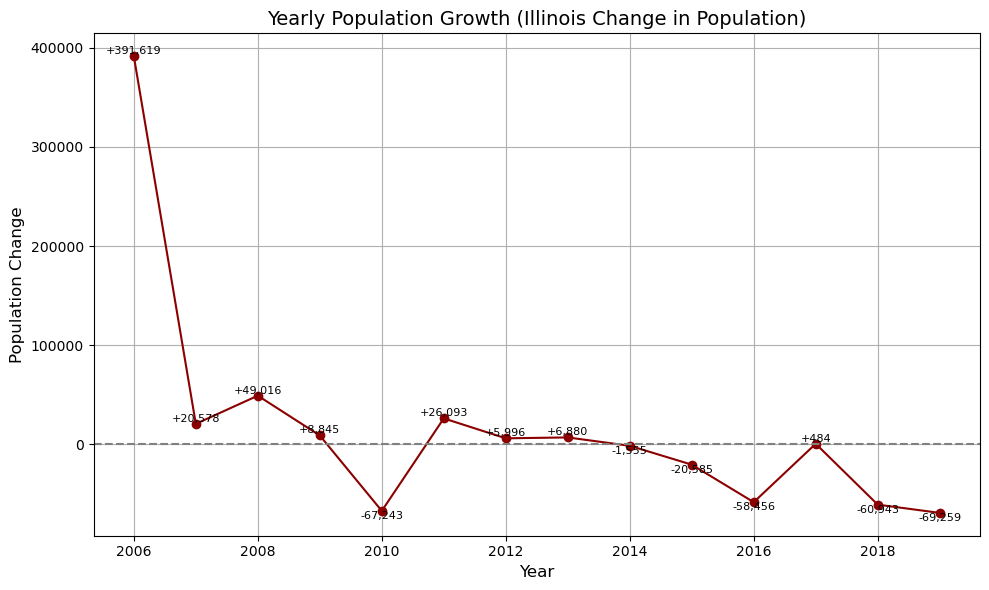

In [15]:
import matplotlib.pyplot as plt

# Original Data
years = [
    2005, 2006, 2007, 2008, 2009,
    2010, 2011, 2012, 2013, 2014,
    2015, 2016, 2017, 2018, 2019
]

population = [
    12440351, 12831970, 12852548, 12901564, 12910409,
    12843166, 12869259, 12875255, 12882135, 12880580,
    12859995, 12801539, 12802023, 12741080, 12671821
]

# Calculate Yearly Growth Rate (Population Change)
growth_rate = []
for i in range(1, len(population)):
    change = population[i] - population[i - 1]
    growth_rate.append(change)

# Corresponding years for growth (excluding the first year)
growth_years = years[1:]

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(growth_years, growth_rate, marker='o', linestyle='-', color='darkred')

# Chart title and labels
plt.title('Yearly Population Growth (Illinois Change in Population)', fontsize=14)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Population Change', fontsize=12)
plt.axhline(0, color='gray', linestyle='--')  # Reference line at 0
plt.grid(True)

# Show values above/below each point (optional)
for i, val in enumerate(growth_rate):
    plt.text(growth_years[i], val, f'{val:+,}', ha='center', va='bottom' if val > 0 else 'top', fontsize=8)

plt.tight_layout()
plt.show()



In [ ]:
###Q2 – Income and Population Relationship

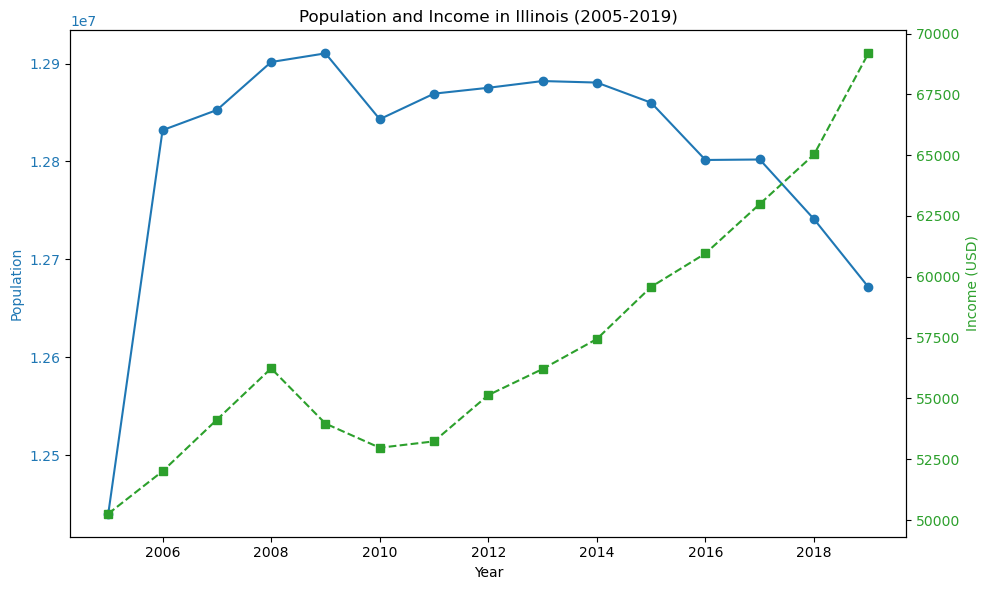

In [20]:
import pandas as pd
import matplotlib.pyplot as plt

# Data: "state_name", "year", "population", "income"
data = {
    'state_name': ['Illinois'] * 15,
    'year': [2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019],
    'population': [12440351, 12831970, 12852548, 12901564, 12910409, 12843166, 12869259, 12875255, 
                   12882135, 12880580, 12859995, 12801539, 12802023, 12741080, 12671821],
    'income': [50260, 52006, 54124, 56235, 53966, 52972, 53234, 55137, 56210, 57444, 59588, 60960, 62992, 65030, 69187]
}

# Convert the data to a pandas DataFrame
df = pd.DataFrame(data)

# Create the figure and axis objects
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plot population data on the first axis (left axis)
ax1.set_xlabel('Year')
ax1.set_ylabel('Population', color='tab:blue')
ax1.plot(df['year'], df['population'], color='tab:blue', marker='o', label='Population')
ax1.tick_params(axis='y', labelcolor='tab:blue')

# Create the second y-axis for income data (right axis)
ax2 = ax1.twinx()
ax2.set_ylabel('Income (USD)', color='tab:green')
ax2.plot(df['year'], df['income'], color='tab:green', marker='s', label='Income', linestyle='--')
ax2.tick_params(axis='y', labelcolor='tab:green')

# Add a title
plt.title('Population and Income in Illinois (2005-2019)')

# Display the plot
fig.tight_layout()
plt.show()


Population and Income trends appear to have a partial negative correlation to each other. This is especially apparent after 2010 where the lines of the population and income begin moving the opposite direction of each other with them even crossing as the population declines and the income inclines. 

In [ ]:
###Q3 - Student Defined Question - What is the correlation between income and population growth percentage?

Correlation between population change rate and income: -0.4865


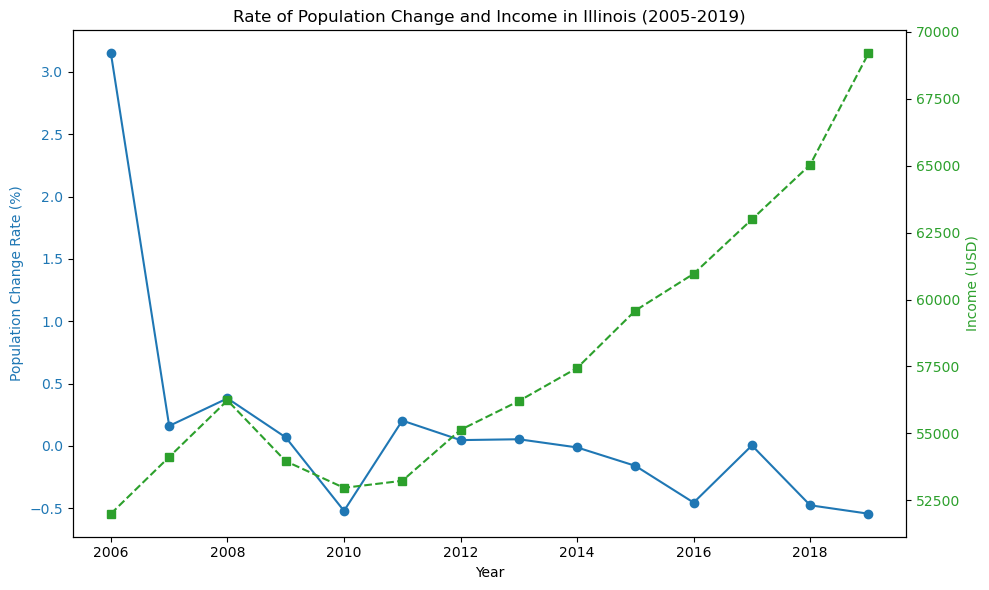

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Data: "state_name", "year", "population", "income"
data = {
    'state_name': ['Illinois'] * 15,
    'year': [2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019],
    'population': [12440351, 12831970, 12852548, 12901564, 12910409, 12843166, 12869259, 12875255, 
                   12882135, 12880580, 12859995, 12801539, 12802023, 12741080, 12671821],
    'income': [50260, 52006, 54124, 56235, 53966, 52972, 53234, 55137, 56210, 57444, 59588, 60960, 62992, 65030, 69187]
}

# Convert the data to a pandas DataFrame
df = pd.DataFrame(data)

# Calculate the rate of population change (percentage change year-over-year)
df['pop_change_rate'] = df['population'].pct_change() * 100  # percentage change

# Drop the first row since it will have NaN for the population change rate
df = df.dropna()

# Calculate the Pearson correlation coefficient
correlation = df['pop_change_rate'].corr(df['income'])

# Print the correlation coefficient
print(f"Correlation between population change rate and income: {correlation:.4f}")

# Create the figure and axis objects for plotting
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plot the rate of population change on the first axis (left axis)
ax1.set_xlabel('Year')
ax1.set_ylabel('Population Change Rate (%)', color='tab:blue')
ax1.plot(df['year'], df['pop_change_rate'], color='tab:blue', marker='o', label='Pop Change Rate')
ax1.tick_params(axis='y', labelcolor='tab:blue')

# Create the second y-axis for income data (right axis)
ax2 = ax1.twinx()
ax2.set_ylabel('Income (USD)', color='tab:green')
ax2.plot(df['year'], df['income'], color='tab:green', marker='s', label='Income', linestyle='--')
ax2.tick_params(axis='y', labelcolor='tab:green')

# Add a title
plt.title('Rate of Population Change and Income in Illinois (2005-2019)')

# Display the plot
fig.tight_layout()
plt.show()

This chart sought to answer the question on if there is a correlation between the rate of population change and income of Illinois. The code also calculated the correlation rate of the variables concluding that there is a -0.4865 correlation rate between population change and income. 